In [1]:
source("/secure/projects/HTAPP_MBC/src/init_phase2.R")

Registered S3 method overwritten by 'R.oo':
  method        from       
  throw.default R.methodsS3
Loading combined annotation: annot


In [2]:
library(pheatmap)

In [3]:
setwd(paste0(spatialDir,"/01_typing/combined_all/"))

In [4]:
de_all=fread(paste0("DE_all_EMT_pheno.tsv"))
de_hp=fread(paste0("DE_EMT_high-patched.tsv"))

### Analyse combined stats

In [5]:
de_all[method=="merfish_clean",method:="merfish_man"]
de_hp[method=="merfish_clean",method:="merfish_man"]

In [6]:
de_hp[,signif:=ifelse(p_welch_fdr_bh<0.05,"p<0.05","p>0.05"),]

In [7]:
head(de_hp)

V1,value,EMT_phenotype,enrichment,p_welch,p_welch_fdr_bh,-log10_p_welch_fdr_bh,high,patched,log2FC(high/patched),signif,annot,method,cell_type
<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
0,ACTA2,high,enriched,0.151333960,0.5868958,0.23143902,0.0007062818,0.0003807006,0.8915870,p>0.05,,merfish_man,MBC
4,ACTG2,high,enriched,0.104496988,0.5151119,0.28809841,0.0061124237,0.0002831475,4.4321190,p>0.05,,merfish_man,MBC
9,ACTR3B,high,purified,0.001576809,0.0831785,1.07998892,0.0010645034,0.0024259450,-1.1883662,p>0.05,ACTR3B,merfish_man,MBC
13,ADGRL4,high,purified,0.326439924,0.8310358,0.08038026,0.0001862168,0.0001344859,0.4695284,p>0.05,,merfish_man,MBC
17,AGR2,high,purified,0.206438963,0.7019144,0.15371587,0.0004191199,0.0006603846,-0.6559435,p>0.05,,merfish_man,MBC
21,AHR,high,purified,0.030855170,0.3635547,0.43943026,0.0005656969,0.0008115877,-0.5207179,p>0.05,,merfish_man,MBC


In [8]:
all_stats_wide_lfc=dcast(de_hp,value+cell_type~method, value.var = "log2FC(high/patched)")
all_stats_wide_p=dcast(de_hp,value+cell_type~method, value.var = "signif")

In [9]:
head(all_stats_wide_lfc)

value,cell_type,codex,exseq,exseq_bin,merfish,merfish_bin,merfish_man,scRNAseq,slide_seq
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ACTA2,Fibroblast,NA,1.6975204,1.32835440,-1.5915755,-2.01356800,-1.5702881,-2.708844,-0.9756274
ACTA2,MBC,NA,2.4554650,2.61010200,0.9303834,0.04492469,0.8915870,NA,NA
ACTA2,Macrophage,NA,2.9175746,4.52547300,-0.5824301,-1.22452350,-0.5415111,NA,NA
ACTA2,T,NA,NA,NA,-1.9401844,-1.74706590,-2.0047972,NA,NA
ACTG2,Fibroblast,NA,2.0393670,0.14198814,-2.1445878,-0.97523690,-2.1427164,-2.243657,NA
ACTG2,MBC,NA,-0.1835326,-0.06399665,4.4290880,3.51215310,4.4321190,2.773568,NA


In [10]:
cors_mbc=cor(all_stats_wide_lfc[cell_type=="MBC",-c("value","cell_type")],use ="pairwise.complete.obs",method = "spearman")
cors_mac=cor(all_stats_wide_lfc[cell_type=="Macrophage",-c("value","cell_type")],use ="pairwise.complete.obs",method = "spearman")
cors_t=cor(all_stats_wide_lfc[cell_type=="T",-c("value","cell_type")],use ="pairwise.complete.obs",method = "spearman")
cors_fib=cor(all_stats_wide_lfc[cell_type=="Fibroblast",-c("value","cell_type")],use ="pairwise.complete.obs",method = "spearman")

In [20]:
paletteLength = 500
colors = colorRampPalette(c("blue", "white", "red"))(paletteLength)
breaks = c(seq(min(cbind(cors_mbc,cors_mac,cors_fib)), 0, length.out=ceiling(paletteLength/2) + 1), 
              seq(max(cbind(cors_mbc,cors_mac,cors_fib))/paletteLength, max(cbind(cors_mbc,cors_mac,cors_fib)), length.out=floor(paletteLength/2)))

png 
  2

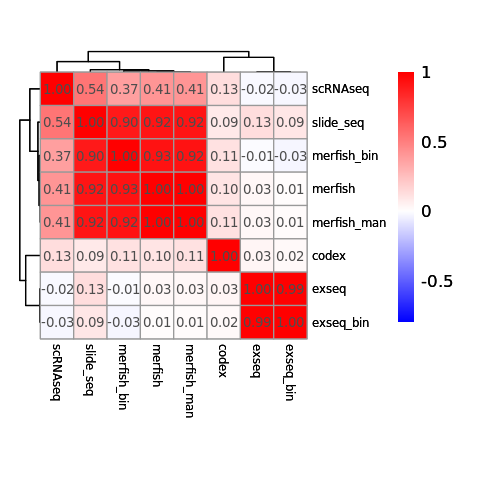

In [21]:
options(repr.plot.width =4, repr.plot.height =4)
pl=pheatmap(cors_mbc,display_numbers = T,cellwidth = 20,cellheight = 20,treeheight_row = 8,treeheight_col = 8,breaks = breaks,
         color = colors,fontsize_row=7,fontsize_col=7)
pdf("EMT_de_cor_hm_mal.pdf",height=4,width=4)
pl
dev.off()
pl

png 
  2

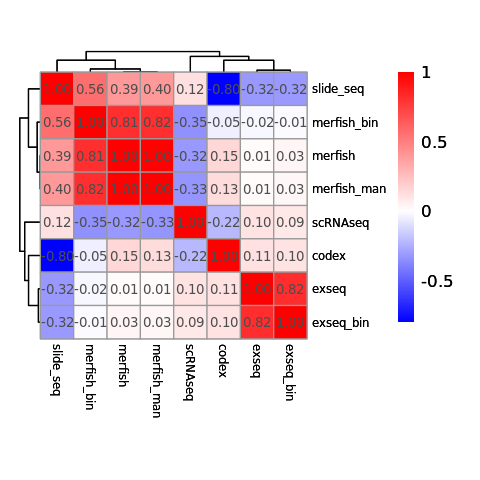

In [23]:
options(repr.plot.width =4, repr.plot.height =4)
pl=pheatmap(cors_mac,cellwidth = 20,cellheight = 20,display_numbers = T,treeheight_row = 8,treeheight_col = 8,breaks = breaks,
         color = colors,fontsize_row=7,fontsize_col=7)
pdf("EMT_de_cor_hm_mac.pdf",height=4,width=4)
pl
dev.off()
pl

In [24]:
cors_t[is.na(cors_t)]=0

png 
  2

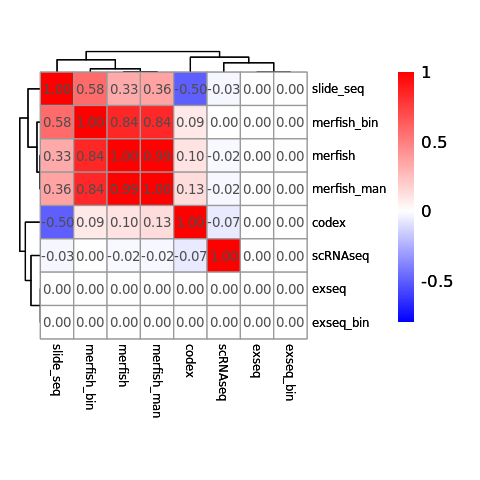

In [25]:
options(repr.plot.width =4, repr.plot.height =4)
pl=pheatmap(cors_t,cellwidth = 20,cellheight = 20,display_numbers = T,treeheight_row = 8,treeheight_col = 8,breaks = breaks,
         color = colors,fontsize_row=7,fontsize_col=7)
pdf("EMT_de_cor_hm_t.pdf",height=4,width=4)
pl
dev.off()
pl

png 
  2

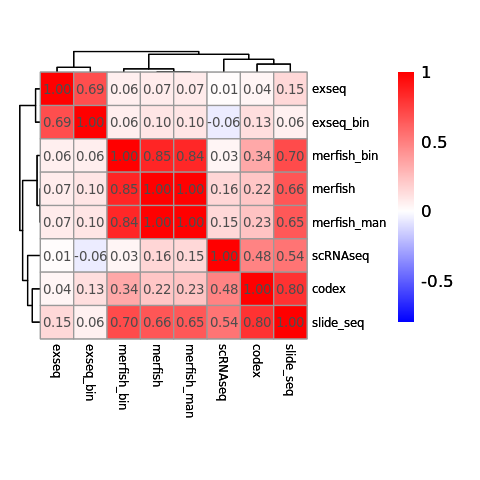

In [26]:
options(repr.plot.width =4, repr.plot.height =4)
pl=pheatmap(cors_fib,cellwidth = 20,cellheight = 20,display_numbers = T,treeheight_row = 8,treeheight_col = 8,breaks = breaks,
         color = colors,fontsize_row=7,fontsize_col=7)
pdf("EMT_de_cor_hm_fib.pdf",height=4,width=4)
pl
dev.off()
pl

png 
  2

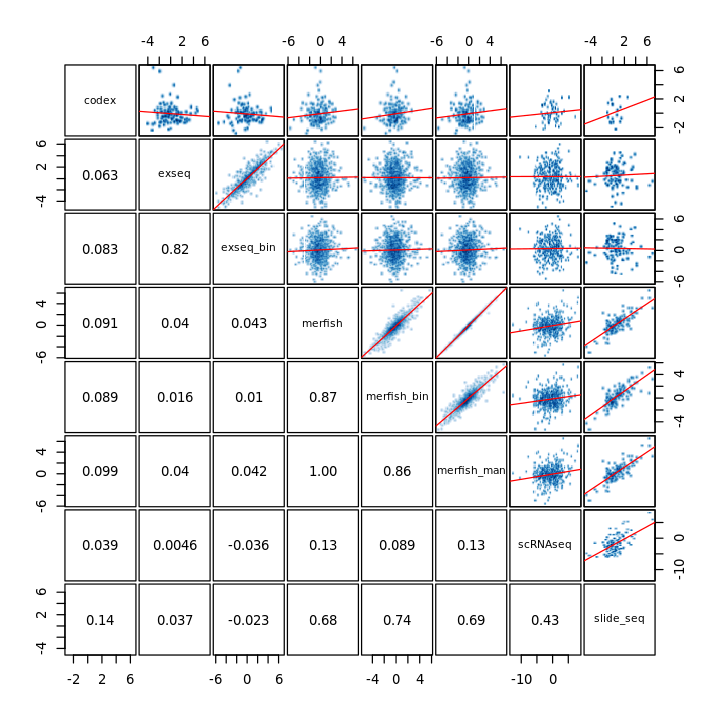

In [72]:
reg <- function(x, y, ...) {
  x[x==Inf]=max(x[x!=Inf])
  x[x==-Inf]=min(x[x!=-Inf])
  y[y==Inf]=max(y[y!=Inf])
  y[y==-Inf]=min(y[y!=-Inf])
#  points(x,y, ...)
  smoothScatter(x,y,add=T,nrpoints = 0,nbin=65,bandwidth=0.1)  
  abline(lm(y~x),col="red") 
  }# made to draw regression line instead of lowess line

panel.cor <- function(x, y, digits = 2, prefix = "", cex.cor, ...)
{
  usr <- par("usr"); on.exit(par(usr))
  par(usr = c(0, 1, 0, 1))
  r <- cor(x, y,use ="pairwise.complete.obs",method = "spearman")
  txt <- format(c(r, 0.123456789), digits = digits)[1]
  txt <- paste0(prefix, txt)
  text(0.5, 0.5, txt, cex = 1, font = 1)
}

options(repr.plot.width =6, repr.plot.height =6)
pl=function(){pairs(all_stats_wide_lfc[,-c("value","cell_type")], 
      upper.panel = reg,
      cex = 1, pch = 19,cex.labels=0.8 ,gap=0.2, lower.panel = panel.cor)}
pdf("EMT_de_pairPlot.pdf",height=6,width=6)
pl()
dev.off()
pl()

In [73]:
DTlong <- melt(all_stats_wide_lfc, id.vars = c("value", "cell_type"),value.name = "val", variable.factor = FALSE)
all_stats_long_lfc <- DTlong[DTlong, on = .(value, cell_type), allow.cartesian = TRUE
  ][variable < i.variable,
  ][, .(ID.new = paste(variable, i.variable, sep = " - "),
        value, cell_type,method.left=variable,method.right=i.variable ,lfc.left = val, lfc.right = i.val)]
head(all_stats_long_lfc)

ID.new,value,cell_type,method.left,method.right,lfc.left,lfc.right
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
codex - exseq,ACTA2,Fibroblast,codex,exseq,NA,1.6975204
codex - exseq,ACTA2,MBC,codex,exseq,NA,2.4554650
codex - exseq,ACTA2,Macrophage,codex,exseq,NA,2.9175746
codex - exseq,ACTA2,T,codex,exseq,NA,NA
codex - exseq,ACTG2,Fibroblast,codex,exseq,NA,2.0393670
codex - exseq,ACTG2,MBC,codex,exseq,NA,-0.1835326


In [74]:
DTlong <- melt(all_stats_wide_p, id.vars = c("value", "cell_type"),value.name = "val", variable.factor = FALSE)
all_stats_long_p <- DTlong[DTlong, on = .(value, cell_type), allow.cartesian = TRUE
  ][variable < i.variable,
  ][, .(ID.new = paste(variable, i.variable, sep = " - "),
        value, cell_type,method.left=variable,method.right=i.variable , p.left = val, p.right = i.val)]
head(all_stats_long_p)

ID.new,value,cell_type,method.left,method.right,p.left,p.right
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
codex - exseq,ACTA2,Fibroblast,codex,exseq,NA,p>0.05
codex - exseq,ACTA2,MBC,codex,exseq,NA,p>0.05
codex - exseq,ACTA2,Macrophage,codex,exseq,NA,p>0.05
codex - exseq,ACTA2,T,codex,exseq,NA,NA
codex - exseq,ACTG2,Fibroblast,codex,exseq,NA,p>0.05
codex - exseq,ACTG2,MBC,codex,exseq,NA,p>0.05


In [75]:
cors_long_mbc=as.data.table(reshape2::melt(cors_mbc))
cors_long_mbc[,ID.new:=paste0(Var1," - ",Var2),]
cors_long_mbc[,cell_type:="MBC",]

cors_long_mac=as.data.table(reshape2::melt(cors_mac))
cors_long_mac[,ID.new:=paste0(Var1," - ",Var2),]
cors_long_mac[,cell_type:="Macrophage",]
cors_long=rbindlist(list(cors_long_mbc,cors_long_mac))

cors_long_t=as.data.table(reshape2::melt(cors_t))
cors_long_t[,ID.new:=paste0(Var1," - ",Var2),]
cors_long_t[,cell_type:="T",]
cors_long=rbindlist(list(cors_long_mbc,cors_long_t))

cors_long_fib=as.data.table(reshape2::melt(cors_fib))
cors_long_fib[,ID.new:=paste0(Var1," - ",Var2),]
cors_long_fib[,cell_type:="Fibroblast",]
cors_long=rbindlist(list(cors_long_mbc,cors_long_mac,cors_long_t,cors_long_fib))
head(cors_long)

Var1,Var2,value,ID.new,cell_type
<fct>,<fct>,<dbl>,<chr>,<chr>
codex,codex,1.00000000,codex - codex,MBC
exseq,codex,0.03412866,exseq - codex,MBC
exseq_bin,codex,0.01963227,exseq_bin - codex,MBC
merfish,codex,0.10193295,merfish - codex,MBC
merfish_bin,codex,0.11084265,merfish_bin - codex,MBC
merfish_man,codex,0.11356086,merfish_man - codex,MBC


In [76]:
all_stats_long_comb=merge(all_stats_long_lfc,all_stats_long_p,by = c("ID.new","value","cell_type","method.left","method.right"))
all_stats_long_comb[,p.comp:=ifelse(p.left==p.right,p.left,"diverging"),]
head(all_stats_long_comb)

ID.new,value,cell_type,method.left,method.right,lfc.left,lfc.right,p.left,p.right,p.comp
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
codex - exseq,ACTA2,Fibroblast,codex,exseq,NA,1.6975204,NA,p>0.05,NA
codex - exseq,ACTA2,MBC,codex,exseq,NA,2.4554650,NA,p>0.05,NA
codex - exseq,ACTA2,Macrophage,codex,exseq,NA,2.9175746,NA,p>0.05,NA
codex - exseq,ACTA2,T,codex,exseq,NA,NA,NA,NA,NA
codex - exseq,ACTG2,Fibroblast,codex,exseq,NA,2.0393670,NA,p>0.05,NA
codex - exseq,ACTG2,MBC,codex,exseq,NA,-0.1835326,NA,p>0.05,NA


Warning message:
"Removed 247 rows containing non-finite values (stat_smooth)."

png 
  2

Warning message:
"Removed 247 rows containing non-finite values (stat_smooth)."

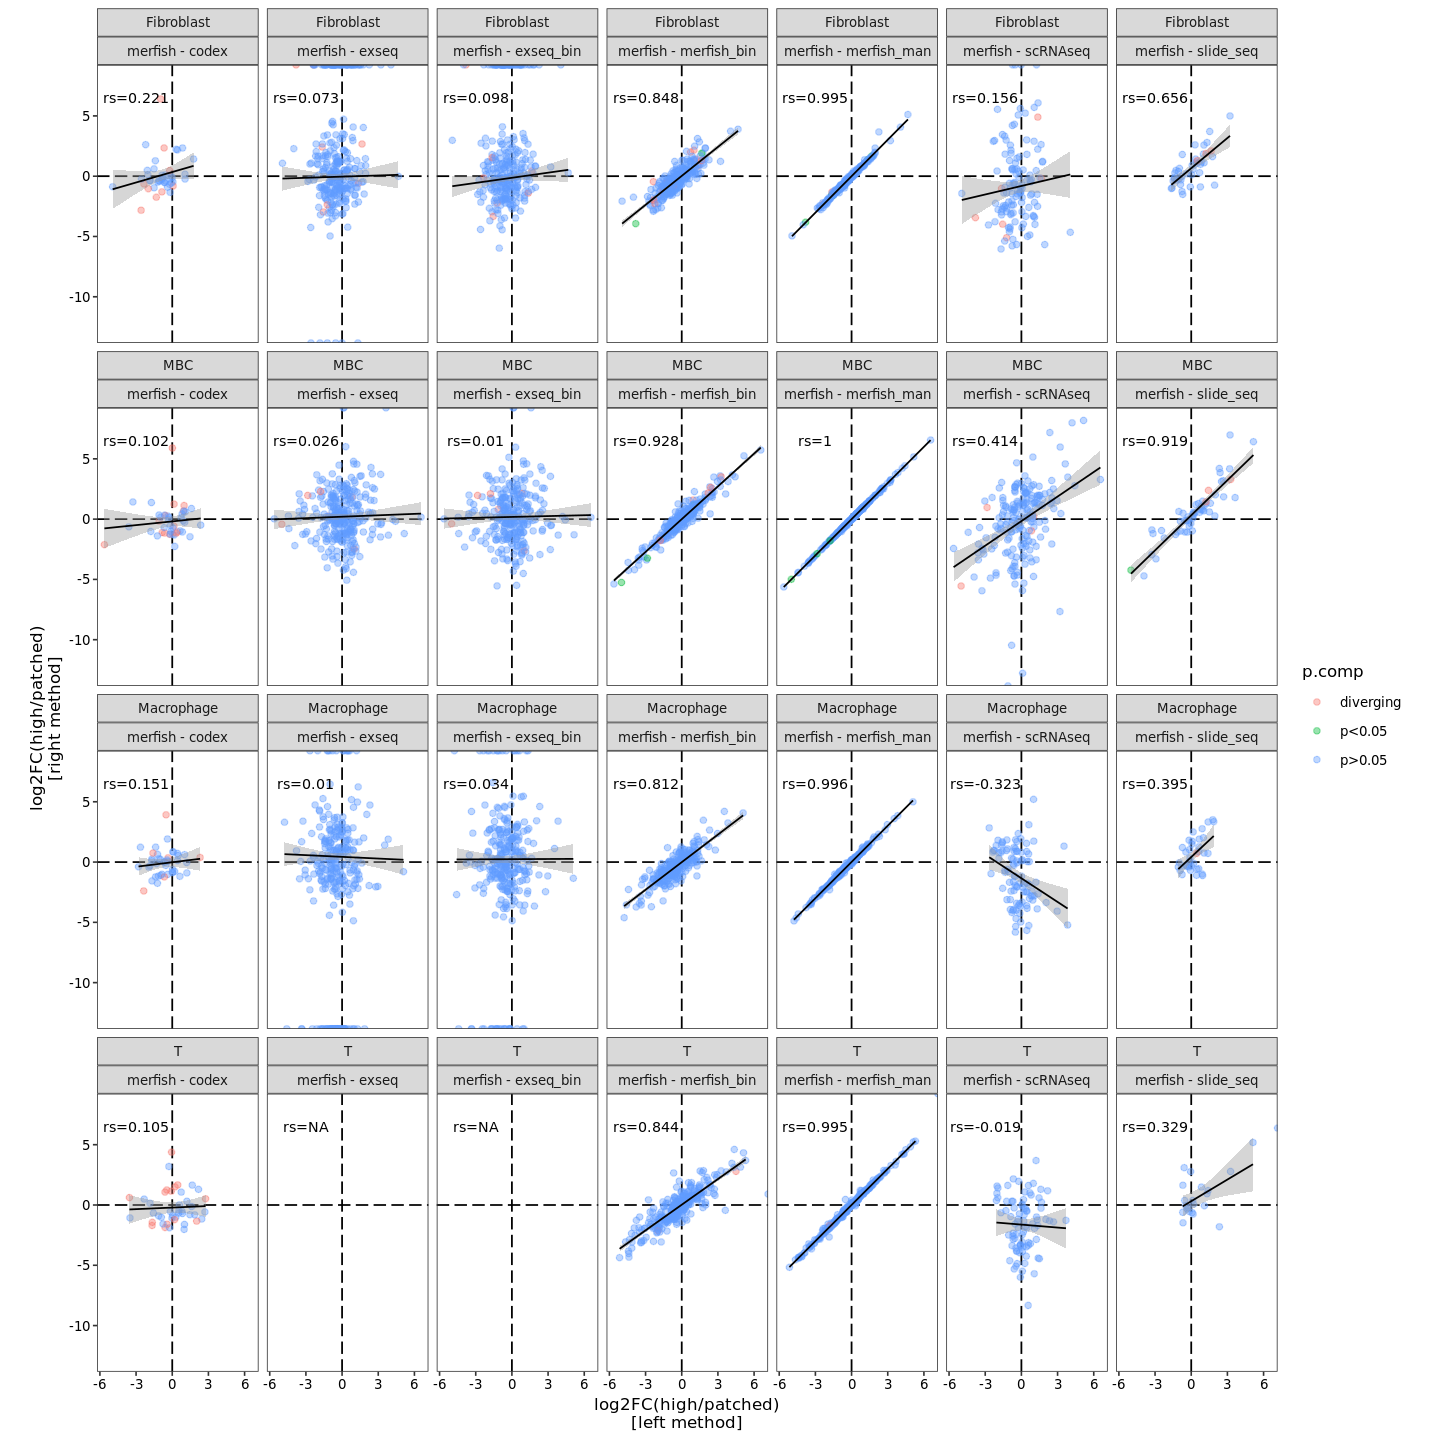

In [79]:
options(repr.plot.width =12, repr.plot.height =12)
sub_lfc=all_stats_long_comb[((method.left=="merfish")|(method.right=="merfish"))&(!is.na(lfc.left)&!is.na(lfc.right))]
#make sure merfish is always the left method
sub_lfc[method.right=="merfish",c("method.left","method.right","lfc.left","lfc.right","p.left","p.right"):=
        list(method.right,method.left,lfc.right,lfc.left,p.right,p.left),]
sub_lfc[,ID.new:=paste0(method.left," - ",method.right)]

sub_cors=cors_long[ID.new%in%sub_lfc$ID.new]

pl=ggplot(sub_lfc,aes(x=lfc.left,y=lfc.right))+geom_hline(yintercept = 0,lty=11)+
geom_vline(xintercept = 0,lty=11)+geom_point(aes(color=p.comp),alpha=0.4)+
geom_smooth(method = 'lm',col="black",lwd=0.5)+
geom_text(data = sub_cors,x=-3,y=6.5,aes(label=paste0("rs=",round(value,3))),size=3)+
coord_fixed(1)+facet_wrap(cell_type~ID.new,nrow=4)+xlab("log2FC(high/patched)\n[left method]")+
ylab("log2FC(high/patched)\n[right method]")

pdf("EMT_de_cor_ct.pdf",height=12,width=12)
pl
dev.off()
pl